<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html sensing.do.txt --no_mako -->
<!-- dom:TITLE: Making sense of sensing?  -->

# Making sense of sensing? 
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo, Norway

Date: **March 2025**

## Motivation and Content

These notes aim at linking entanglement in quantum mechanical systems
with quantum sensing using simple examples.  Numerical codes are
included in order to illustrate basic elements of sensing.  The
examples are tailored to simple one- and two-qubit systems. The
material contains
1. One-qubit system with basic elements of sensing

2. Linking analytically solvable case with many-qubit entanglement and sensing

3. Simple two-particle (or two-qubit) system to demonstrate entanglement and its links with sensing (to come)

## More material will be added

In particular, we will include
* Quantum computing simulations of the above systems using the Variational Quantum Eigensolver algorithm

* Discussion of Fisher entropy and other measures

* Numerical codes for general time-dependent interactions

* Initial state preparations and final results and more

Feel free to come with suggestions for additions. You can access the material at <https://github.com/mhjensenseminars/MachineLearningTalk/blob/master/doc/pub/sensing/ipynb/sensing.ipynb>

## Literature

In the discussions here we have borrowed extensively from two Review of Modern Physics
articles
1. **Quantum sensing**, C.L. Degen, F. Reinhard, and P. Cappellaro, Reviews of  Modern  Physics **89**, 035002 (2017), see <https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.89.035002>

2. **Quantum metrology with nonclassical states of atomic ensembles**, L. Pezzè, A. Smerzi, M.K. Oberthaler, R. Schmied, and P. Treutlein, Reviews of  Modern  Physics **90**, 035005 (2018), see <https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.90.035005>

3. See also recent work by Liu et at <https://www.nature.com/articles/s41534-021-00507-x>. We may add codes which simulate these systems as well, stay tuned.

## One-qubit system

In the first part of this notebook, we will analyze our systems using
plain diagonalization and simple analytical manipulations.  Thereafter
we will develop codes and material for performing a quantum computing
simulation of the same systems (this material is not yet ready).

Our first encounter is a simple one-qubit system, described by a simple $2\times 2$ Hamiltonian.

We start with a simple $2\times 2$ Hamiltonian matrix expressed in
terms of Pauli $\boldsymbol{X}$, $\boldsymbol{Y}$  and $\boldsymbol{Z}$ matrices. But before we proceed, a simple reminder is appropriate.

## Definitions: Single qubit gates

The Pauli matrices (and gate operations following therefrom) are defined as

$$
\boldsymbol{X} \equiv \sigma_x = \begin{bmatrix}
		0 & 1 \\
		1 & 0
	\end{bmatrix}, \quad
	\boldsymbol{Y} \equiv \sigma_y = \begin{bmatrix}
		0 & -i \\
		i & 0
	\end{bmatrix}, \quad
	\boldsymbol{Z} \equiv \sigma_z = \begin{bmatrix}
		1 & 0 \\
		0 & -1
	\end{bmatrix}.
$$

## Pauli-$\boldsymbol{X}$ gate

The Pauli-$\boldsymbol{X}$ gate is also known as the **NOT** gate, which flips the state of the qubit.

$$
\begin{align*}
	\boldsymbol{X}\vert 0\rangle &= \vert 1\rangle, \\
	\boldsymbol{X}\vert 1\rangle &= \vert 0\rangle.	
\end{align*}
$$

The Pauli-$\boldsymbol{Y}$ gate flips the bit and multiplies the phase by $ i $.

$$
\begin{align*}
	\boldsymbol{Y}\vert 0\rangle &= i\vert 1\rangle, \\
	\boldsymbol{Y}\vert 1\rangle &= -i\vert 0\rangle.
\end{align*}
$$

The Pauli-$\boldsymbol{Z}$ gate multiplies only the phase of $\vert 1\rangle$ by $ -1 $.

$$
\begin{align*}
	\boldsymbol{Z}\vert 0\rangle &= \vert 0\rangle, \\
	\boldsymbol{Z}\vert 1\rangle &= -\vert 1\rangle.
\end{align*}
$$

## Hadamard gate

The Hadamard gate is defined as

$$
\boldsymbol{H} = \frac{1}{\sqrt{2}} \begin{bmatrix}
		1 & 1 \\
		1 & -1
	\end{bmatrix}.
$$

It creates a superposition of the $ \vert 0\rangle $ and $ \vert 1\rangle $ states.

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
	\boldsymbol{H}\vert 0\rangle = \frac{1}{\sqrt{2}} \left( \vert 0\rangle + \vert 1\rangle \right), 
\label{_auto1} \tag{1}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation} 
	\boldsymbol{H}\vert 1\rangle = \frac{1}{\sqrt{2}} \left( \vert 0\rangle - \vert 1\rangle \right).
\label{_auto2} \tag{2}
\end{equation}
$$

Note that we will use $H$ as symbol for the Hadamard gate while we will reserve the notation $\mathcal{H}$ for a given Hamiltonian.

## Sensing Hamiltonian

For our discussions, we will assume that the quantum sensor can be
described by the generic Hamiltonian (we follow here Degen *et al.,*

$$
\mathcal{H}(t) = \mathcal{H}_0 + \mathcal{H}_I(t) + \mathcal{H}_\mathrm{control}(t),
$$

where $\mathcal{H}_0$ is the internal Hamiltonian, $\mathcal{H}_I(t)$ is the
Hamiltonian associated with a signal ($V(t)$ in the notes below), and
$\mathcal{H}_\mathrm{control}(t)$ is the control Hamiltonian.  Following
the above mentioned authors, we will assume that $\mathcal{H}_0$ is known
and that $\mathcal{H}_\mathrm{control}(t)$ can be chosen so as to
manipulate or tune the sensor in a controlled way.

The goal of a quantum sensing experiment is then to infer $V(t)$ from
the effect it has on the actual qubits via its Hamiltonian
$\mathcal{H}_I(t)$, usually by a specific choice of
$\mathcal{H}_\mathrm{control}(t)$.

## Time-dependent Hamiltonian matrix

We define a  hermitian  matrix  $H\in {\mathbb{R}}^{2\times 2}$

$$
\mathcal{H} = \begin{bmatrix} \mathcal{H}_{11} & \mathcal{H}_{12} \\ \mathcal{H}_{21} & \mathcal{H}_{22}
\end{bmatrix},
$$

We  let $\mathcal{H} = \mathcal{H}_0 + \mathcal{H}_I$, where

$$
\mathcal{H}_0= \begin{bmatrix} E_0 & 0 \\ 0 & E_1\end{bmatrix},
$$

is a diagonal matrix. Similarly,

$$
\mathcal{H}_I(t)= \begin{bmatrix} V_{11}(t) & V_{12}(t) \\ V_{21}(t) & V_{22}(t)\end{bmatrix},
$$

where $V_{ij}(t)$ represent various time-dependent interaction matrix elements and since we have a hermitian matrix, we require that
$V_{21}=V_{12}^*$.

## Interaction part

We will now label  the interaction matrix elements, assuming that they have an explicit time dependence.
We define

$$
\begin{align*}
V_{11} & = V_z(t)\\
V_{22} & = -V_z(t)\\
V_{12} & = V_x(t)-\imath V_y(t).
\end{align*}
$$

In the numerical example below we let $V_y(t)=0$, $V_z(t) = tV_z$
and $V_x(t) = tV_x$ with $V_z$ and $V_x$ real-valued constants to
be determined. In the same numerical example we let $t\in [0,1]$.

## Non-interacting solution

We can view $H_0$ as the non-interacting solution

$$
\mathcal{H}_0\vert 0 \rangle =E_0\vert 0 \rangle,
$$

and

$$
\mathcal{H}_0\vert 1\rangle =E_1\vert 1\rangle,
$$

where we have defined the orthogonal computational one-qubit basis states $\vert 0\rangle$ and $\vert 1\rangle$.

## Rewriting with Pauli matrices

We rewrite $H$ (and $H_0$ and $H_I$)  via Pauli matrices

$$
\mathcal{H}_0 = \mathcal{E}_{\mathrm{avg}} I -\Delta E \boldsymbol{Z}, \quad \mathcal{E}_{\mathrm{avg}} = \frac{E_0
  + E_1}{2}, \; \Delta E = \frac{E_1-E_0}{2},
$$

and

$$
\mathcal{H}_I = V_z(t)\boldsymbol{Z} + V_x(t)\boldsymbol{X}+V_y(t)\boldsymbol{Y},
$$

with $V_z(t) = V_{11}=-V_{22}$, $V_x(t) = \Re (V_{12})$ and $V_y(t) = \Im (V_{12})$.

This is the expression we will discuss in connection with quantum computing simulations. The discussions here, focus mainly on some simpler analytical considerations and simplifications. The numerical solutions are also given by standard eigenvalue solvers.

## Simple time dependence
We let our Hamiltonian depend linearly on time  $t$

$$
\mathcal{H}=\mathcal{H}_0+t \mathcal{H}_\mathrm{I},
$$

with $t \in [0,1]$, where the limits $t=0$ and $t=1$
represent the non-interacting (or unperturbed) and fully interacting
system, respectively. This means that the various potential terms are given by $V_i(t)=tV_i$, with $i=\{x,y,z\}$ and $V_i$ real-valued constants.

## Exact solution

Since this a simple $2\times 2$ matrix eigenvalue problem we find the eigenvalues $\lambda_{\pm}$ to be

$$
\lambda_{\pm}=\mathcal{E}_{\mathrm{avg}}\pm \Delta E\sqrt{1+\frac{2V_z(t)}{\Delta E}+\frac{1}{\Delta E^2}(V_z^2(t)+V_x^2(t)+V_y^2(t))}.
$$

If we assume that $\Delta E \gg V_z(t)$ and set $V_x(t)=V_y(t)=0$ for
simplicity and Taylor-expand our square root expression we obtain

$$
\lambda_{0}=E_0-\frac{1}{2}V_z(t),
$$

$$
\lambda_{1}=E_1+\frac{1}{2}V_z(t),
$$

where we kept only terms up to $\Delta E$. The above problem can however be easily solved numerically, see the code here.

## Selecting parameters

The model is an eigenvalue problem with only
two available states.

Here we set the parameters $E_0=0$,
$E_1=4$, $V_{11}=-V_{22}=3$ and $V_{12}=V_{21}=0.2$.

The non-interacting solutions represent our computational basis.
Pertinent to our choice of parameters, is that at $t\geq 2/3$,
the lowest eigenstate is dominated by $\vert 1\rangle$ while the upper
is $\vert 0 \rangle$. At $t=1$ the $\vert 0 \rangle$ mixing of
the lowest eigenvalue is $1\%$ while for $t\leq 2/3$ we have a
$\vert 0 \rangle$ component of more than $90\%$.  The character of the
eigenvectors has therefore been interchanged when passing $z=2/3$. The
value of the parameter $V_{12}$ represents the strength of the coupling
between the two states.  Here we keep only the real part of the non-diagonal term.

## Setting up the matrix for the simple one-qubit system

Here we solve the above problem as a standard eigenvalue problem.

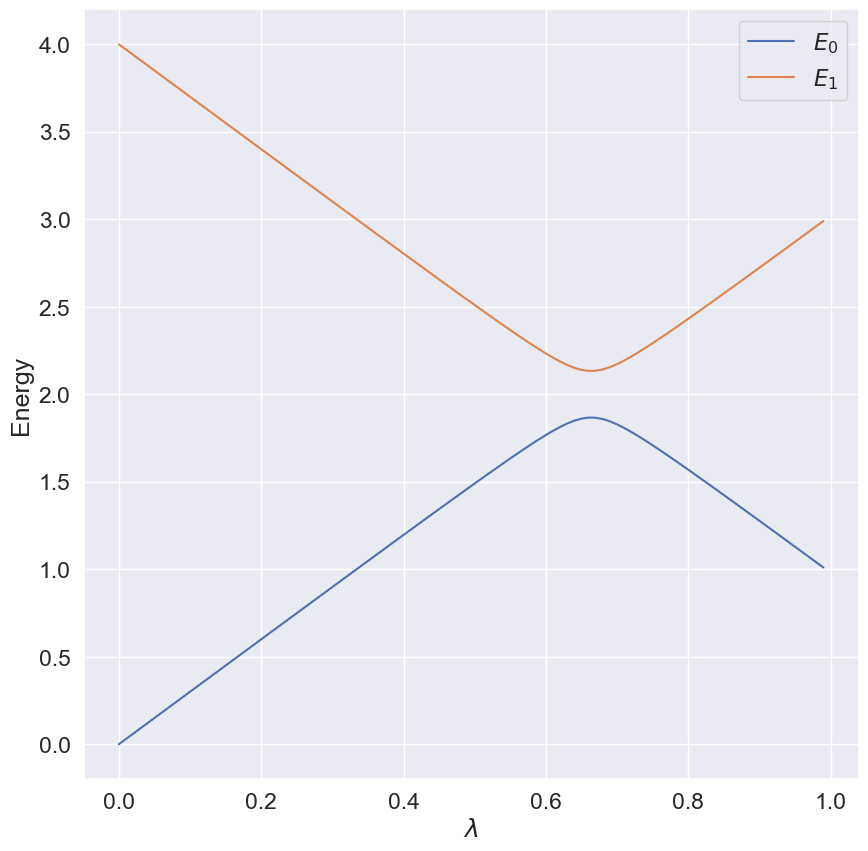

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(font_scale=1.5)
from tqdm import tqdm

sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])
I = np.eye(2)

def Hamiltonian(lmb):
    E0 = 0
    E1 = 4
    V11 = 3
    V22 = -3
    V12 = 0.2
    V21 = 0.2

    eps = (E0 + E1) / 2
    omega = (E0 - E1) / 2
    c = (V11 + V22) / 2
    omega_z = (V11 - V22) / 2
    omega_x = V12

    H0 = eps * I + omega * sigma_z
    H1 = c * I + omega_z * sigma_z + omega_x * sigma_x
    return H0 + lmb * H1
    
lmbvalues_ana = np.arange(0, 1, 0.01)
eigvals_ana = np.zeros((len(lmbvalues_ana), 2))
for index, lmb in enumerate(lmbvalues_ana):
    H = Hamiltonian(lmb)
    eigen, eigvecs = np.linalg.eig(H)
    permute = eigen.argsort()
    eigvals_ana[index] = eigen[permute]
    eigvecs = eigvecs[:,permute]


fig, axs = plt.subplots(1, 1, figsize=(10, 10))
for i in range(2):
    axs.plot(lmbvalues_ana, eigvals_ana[:,i], label=f'$E_{i}$')
axs.set_xlabel(r'$\lambda$')
axs.set_ylabel('Energy')
axs.legend()
plt.show()

## Initialization and sensing analysis

We stay now with the Taylor-approximated solution in order to illustrate some of the basic sensing ideas.

To initialize a given system to a known quantum state, we first start
with a known initial state $|0\rangle$. Then, depending on the type of
information that we want to learn about the stimulus, the measurement
scheme to be used, and the physical implementation of the quantum
system, we choose some unitary operator $U_{\mathrm{Init}}$ such that
it transforms our state $|0\rangle$ to a desired initial superposition
state $\left|\psi_{\mathrm{Init}}\right\rangle=a|0\rangle+b|1\rangle$
for some $a, b \in \mathbb{C}$ such that $|a|^{2}+|b|^{2}=1$.

## Effects of stimulus

After the sensing state is initialized, it is exposed to the
environment and evolves according to the time-evolution operator of
the sensing Hamiltonian via the unitary transformation $\boldsymbol{U}$ as (setting $\hbar=c=e=1$)

$$
|\psi(t)\rangle=\boldsymbol{U}(t, 0)\left|\psi_{\mathrm{Init }}(0)\right\rangle.
$$

In general we have

$$
\boldsymbol{U}(t, 0)=\exp{\imath\int_{0}^{t}
\mathcal{H}(\tau) d \tau}.
$$

Here the Hamiltonian could be a
complicated, non-analytical function with a time-dependent $V(t)$
(making $\mathcal{H}$ time-dependent as well).

## Slowly changing potential

In the case where $V(t)$ is constant or changes much more slowly than our sensing integration time, we can assume

$$
|\psi(t)\rangle=\boldsymbol{U}(t, 0)\left|\psi_{\mathrm{Init}}(0)\right\rangle=\exp{\imath t \mathcal{H}}\left|\psi_{\mathrm{Init }}(0)\right\rangle.
$$

The sensing state evolves thus as

$$
|\psi(t)\rangle=\left(\exp{\imath t\left(E_{0}-\frac{1}{2}  V_z\right)}\left|\lambda_{0}\right\rangle\left\langle\lambda_{0}\right|+\exp{\imath t\left(E_{1}+\frac{1}{2}  V_z\right)}\left|\lambda_{1}\right\rangle\left\langle\lambda_{1}\right|\right)\left|\psi_{\mathrm{Init}}(0)\right\rangle,
$$

where we have using the spectral decomposition and the final representation of the
sensing Hamiltonian found above.

## Readout

After the sensing state has evolved over time in the presence of $V(t)$, it
can be transformed again before a measurement is taken. The first
part, the transformation to some desired read-out state, is performed
by a readout  operator, see discussions in Degen et al., 2017) where

$$
\left|\psi_{\mathrm{Final}}\right\rangle=\boldsymbol{U}_{\mathrm{Readout}}|\psi(t)\rangle.
$$

Here the readout operator $\boldsymbol{U}_{\mathrm{Readout}}$ is left unspecified.

## Measurement

A measurement of this final state $\left|\psi_{\mathrm{Final}}\right\rangle=a^{\prime}|0\rangle+b^{\prime}|1\rangle$ is made with
respect to the basis $\{|0\rangle,|1\rangle\}$ where
$|0\rangle$ is measured with  probability

$$
\left|\left\langle 0 \mid \psi_{\mathrm{Final}}\right\rangle\right|^{2}=\left|a^{\prime}\right|^{2},
$$

and $|1\rangle$ is measured with probability

$$
\left|\left\langle 1 \mid\psi_{\mathrm{Final}}\right\rangle\right|^{2}=\left|b^{\prime}\right|^{2}.
$$

After this measurement, the sensing state has collapsed into one
of the basis states and  no more information can be gained.

## Multiple measurements

However, by having
multiple quantum sensing elements time-evolving together or by
repeating the process many times before the external stimulus $V(t)$
can change, a transition probability

$$
p_{|0\rangle\rightarrow|1\rangle}=\left|\left\langle 1 \mid \psi_{\mathrm{Final}}\right\rangle\right|^{2}=\left|b^{\prime}\right|^{2},
$$

can be estimated. The *sensing* is then achieved by taking a
series of these transition probabilities as a time series, and then
using the results to estimate the sensed stimulus $V(t)$, see for example the abovementioned review of
Degen et al., 2017.

## Example

The simplest mathematical example of quantum sensing is sensing an
external stimulus's effect on the splitting of the energy levels of an
isolated system. Suppose our stimulus is constant and *parallel* with
our sensor, that is we set  $V_z(t)=V_{0}$ and $V_x=0$, and we choose
our initialization and readout preparation operators to be the famous
Hadamard gate

$$
\boldsymbol{U}_{H}=\frac{1}{\sqrt{2}}\left[\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right].
$$

Here, the subscript $H$ stands for the Hadamard unitary transformation.

## Evolution of initial state

The initial state is

$$
\left|\psi_{\mathrm{Init}}\right\rangle=\boldsymbol{U}_{\mathrm{Hadamard}}|0\rangle=\frac{1}{\sqrt{2}}\left[\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right]\begin{bmatrix} 1 \\ 0\end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1\end{bmatrix}.
$$

This may not necessarily be the same basis into which the system was
initialized, but we  assume it is so and then we only have to keep track
of one basis.

## State evolution

The state evolves as

$$
\begin{align*}
|\psi(t)\rangle=&\left(\exp{\frac{i t}{\hbar}\left(E_{0}-\frac{1}{2}  V_z\right)}|0\rangle\langle 0|+\exp{\frac{i t}{\hbar}\left(E_{1}+\frac{1}{2}  V_z\right)}|1\rangle\langle 1|\right)\left|\psi_{\text {Init }}(0)\right\rangle\\
&=\left(\begin{array}{cc}
e^{\frac{i t}{\hbar}\left(E_{0}-\frac{1}{2}  V_z\right)} & 0 \\
0 & e^{\frac{i t}{\hbar}\left(E_{1}+\frac{1}{2}  V_z\right)}
\end{array}\right) \frac{1}{\sqrt{2}}\binom{1}{1} \\
& =\frac{1}{\sqrt{2}}\binom{e^{\frac{i t}{\hbar}\left(E_{0}-\frac{1}{2}  V_z\right)}}{e^{\frac{i t}{\hbar}\left(E_{1}+\frac{1}{2}  V_z\right)}}\\
&=\frac{1}{\sqrt{2}} e^{\frac{i t}{\hbar}\left(E_{0}-\frac{1}{2}  V_z\right)}\binom{1}{e^{\frac{i t}{\hbar}\left(E_{1}-E_{0}+ V_z\right)}}
\end{align*}
$$

## Preparing for readout

This is then prepared for readout as

$$
\vert\psi_{\mathrm{Final}}\rangle=\frac{1}{2} \exp{\frac{\imath t}{\hbar}(E_{0}-\frac{1}{2}  V_z)}
\begin{bmatrix} 1+\exp{\frac{\imath t}{\hbar}(E_{1}-E_{0}+ V_z)} \\ 1-\exp{(\frac{\imath t}{\hbar}(E_{1}-E_{0}+ V_z)}\end{bmatrix}.
$$

## Transition probability

The transition probability

$$
\begin{align*}
p_{|0\rangle \rightarrow|1\rangle}=\left|\left\langle 1 \mid \psi_{\text {Final }}\right\rangle\right|^{2}=&\left|1-e^{\frac{i t}{\hbar}\left(E_{1}-E_{0}+ V_z\right)}\right|^{2}\\
&=\frac{1}{2}\left(1-\cos \left(t \frac{\left(E_{1}-E_{0}\right)+ V_z}{\hbar}\right)\right)
\end{align*}
$$

## [Ramsey interferometry](https://en.wikipedia.org/wiki/Ramsey_interferometry)

We know the difference in energy between $E_{1}$ and $E_{0}$, either
since we constructed the system or by taking measurements without the
external stimulus $V$, and we can control the time $t$ for which the
system is allowed to evolve under the external stimulus. Then we can
fix $t$ and take many measurements to estimate $p_{|0\rangle
\rightarrow|1\rangle}$, which then makes finding $t \frac{
V_z}{\hbar}$ a simple phase-estimation problem which gives us $
V_z$. The physical implementation of this process is known as Ramsey
Interferometry, and it can be done with arbitary initialization and
readout preparation unitary operators.

## Benefits of Entanglement

Up until now, we have said that we take many measurements of
$\left|\psi_{\text {Final }}\right\rangle$ to estimate $p_{|0\rangle
\rightarrow|1\rangle}$, but we have been glossing over the estimation
process. Assuming we can take $N$ measurements, either by having $N$
experimental apparatuses running in parallel or by taking $N$
different measurements of a (relatively) constant $V$ with a single
apparatus, the uncertainty in $p$, denoted as $\sigma_{p}$ (this is a
positive real number; not to be confused with the Pauli matrices),
scales as

$$
\sigma_{p} \propto \frac{1}{\sqrt{N}}
$$

## Ramsey interferometry

If we consider Ramsey Interferometry as an example, see <https://en.wikipedia.org/wiki/Ramsey_interferometry>, then the
uncertainty in $ V_z$ and so in $V_z$, denoted $\sigma_{V}$,
scales as

$$
\sigma_{V} \propto \sigma_{p} \propto \frac{1}{\sqrt{N}}
$$

This relationship is known as the standard quantum limit (SQL)
[Giovannetti et al., 2011], but can also be explained with the Law of

Large Numbers from statistics, where measuring $N$ similarly
distributed, well-behaved random variables gives the sample mean as an
estimator for the population mean and the sample variance divided by
the size of the sample as an uncertainty in the estimate of the
population mean.

## More than one qubit

The nature of quantum systems allows for more information to be
extracted by exploiting entanglement between quantum systems. This is
the fundamental basis for the benefits of quantum computing over
classical computing, and quantum sensing has similar benefits over
classical sensing. Suppose we return to the example above, but rather
than initializing $N$ sensing qubits separately, we initialize
$\frac{N}{n}$ groups each with $n$ entangled quantum systems. Then we
have

$$
\left|\psi_{\text {Init }}\right\rangle=\frac{1}{\sqrt{2^{n}}}\left(|0\rangle^{\otimes n}+|1\rangle^{\otimes n}\right),
$$

where $|0\rangle^{\otimes n}=|0\rangle \otimes \ldots \otimes|0\rangle, n$ times.

## After initialization

After initialization, each of the $n$ sensing qubits evolves to pick up a relative phase factor of $e^{\frac{i t}{\hbar}\left(E_{1}-E_{0}+ V_z\right)}$, which combined results in

$$
|\psi(t)\rangle=\mathcal{N}\left(|0\rangle^{\otimes n}+e^{n \frac{i t}{\hbar}\left(E_{1}-E_{0}+ V_z\right)}|1\rangle^{\otimes n}\right)
$$

where $\mathcal{N}$ is just a factor to take care of normalization.

## Transition probability

The transition probability

$$
p_{|0\rangle \rightarrow|1\rangle}=\left|\left\langle 1 \mid \psi_{\text {Final }}\right\rangle\right|^{2}=\frac{1}{2}\left(1-\cos \left(t \frac{n\left(E_{1}-E_{0}\right)+n  V_z}{\hbar}\right)\right)
$$

## Role of entanglement

From this, we can see that through entangling $n$ sensing qubits, the
**signal** we are trying to sense increases from $V_z \rightarrow n
V_z$, and with $\frac{N}{n}$ total measurements,

$$
\sigma_{V} \propto \frac{1}{n} \sigma_{p} \propto \frac{1}{n}\left(\frac{1}{\sqrt{\frac{N}{n}}}\right)=\frac{1}{\sqrt{N n}}
$$

which means the error decreased by a factor of $\sqrt{n}$. In the case where $n=N$, the uncertainty now scales as

$$
\sigma_{V} \propto \frac{1}{N}
$$

which is known as the Heisenberg limit, and is the
quantum-mechanically limited, maximal amount of information one can
get from taking $n$ quantum sensing measurements [Giovannetti et al.,
2011].

## Concluding remarks for the simple example

Quantum sensing is an emerging field with a large number of exciting
applications. In terms of physical implementation, quantum sensors are
able to naturally be more sensitive and sense on smaller scales than
many classical sensors, while also often being directly tracable to
fundamental physical constants.

Additionally, exploiting entanglement and the quantum nature of these
devices allows for fundamentally more information to be collected than
is allowed by classical measurements and the SQL. Quantum sensing
fundamentally improves upon the physical and theoretical limitations
of classical sensing, and it will be interesting to see how and what
physical realizations develop to the point of practicality in the near
future.

## Two-qubit system, Computational basis

Our computational basis states

$$
\vert 00\rangle = \vert 0\rangle_{\mathrm{A}}\otimes \vert 0\rangle_{\mathrm{B}}=\begin{bmatrix} 1 & 0 & 0 &0\end{bmatrix}^T,
$$

and

$$
\vert 01\rangle = \vert 0\rangle_{\mathrm{A}}\otimes \vert 1\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 1 & 0 &0\end{bmatrix}^T,
$$

and

$$
\vert 10\rangle = \vert 1\rangle_{\mathrm{A}}\otimes \vert 0\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 0 & 1 &0\end{bmatrix}^T,
$$

and finally

$$
\vert 11\rangle = \vert 1\rangle_{\mathrm{A}}\otimes \vert 1\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 0 & 0 &1\end{bmatrix}^T.
$$

## Simple system to lllustrate entanglement

This system can be thought of as composed of two subsystems
$A$ and $B$. Each subsystem has computational basis states

$$
\vert 0\rangle_{\mathrm{A,B}}=\begin{bmatrix} 1 & 0\end{bmatrix}^T \hspace{1cm} \vert 1\rangle_{\mathrm{A,B}}=\begin{bmatrix} 0 & 1\end{bmatrix}^T.
$$

The subsystems could represent single particles or composite many-particle systems of a given symmetry.

## Computational basis states

This leads to the many-body computational basis states

$$
\vert 00\rangle = \vert 0\rangle_{\mathrm{A}}\otimes \vert 0\rangle_{\mathrm{B}}=\begin{bmatrix} 1 & 0 & 0 &0\end{bmatrix}^T,
$$

and

$$
\vert 01\rangle = \vert 0\rangle_{\mathrm{A}}\otimes \vert 1\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 1 & 0 &0\end{bmatrix}^T,
$$

and

$$
\vert 10\rangle = \vert 1\rangle_{\mathrm{A}}\otimes \vert 0\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 0 & 1 &0\end{bmatrix}^T,
$$

and finally

$$
\vert 11\rangle = \vert 1\rangle_{\mathrm{A}}\otimes \vert 1\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 0 & 0 &1\end{bmatrix}^T.
$$

## Eigenstates of non-interacting Hamiltonian

These computational basis states define the eigenstates of the non-interacting  Hamiltonian

$$
H_0\vert 00 \rangle = \epsilon_{00}\vert 00 \rangle,
$$

$$
H_0\vert 10 \rangle = \epsilon_{10}\vert 10 \rangle,
$$

$$
H_0\vert 01 \rangle = \epsilon_{01}\vert 01 \rangle,
$$

and

$$
H_0\vert 11 \rangle = \epsilon_{11}\vert 11 \rangle.
$$

## Interaction part

The interacting part of the Hamiltonian $H_{\mathrm{I}}$ is given by the tensor product of two $\sigma_x$ and $\sigma_z$  matrices, respectively, that is

$$
H_{\mathrm{I}}=H_x\sigma_x\otimes\sigma_x+H_z\sigma_z\otimes\sigma_z,
$$

where $H_x$ and $H_z$ are interaction strength parameters. Our final Hamiltonian matrix is given by

$$
\boldsymbol{H}=\begin{bmatrix} \epsilon_{00}+H_z & 0 & 0 & H_x \\
                       0  & \epsilon_{10}-H_z & H_x & 0 \\
		       0 & H_x & \epsilon_{01}-H_z & 0 \\
		       H_x & 0 & 0 & \epsilon_{11} +H_z \end{bmatrix}.
$$

## Density matrices

The four eigenstates of the above Hamiltonian matrix can in turn be used to
define density matrices. As an example, the density matrix of the
first eigenstate (lowest energy $E_0$) $\Psi_0$ is given by the outerproduct

$$
\rho_0=\left(\alpha_{00}\vert 00 \rangle+\alpha_{10}\vert 10 \rangle+\alpha_{01}\vert 01 \rangle+\alpha_{11}\vert 11 \rangle\right)\left(\alpha_{00}^*\langle 00\vert+\alpha_{10}^*\langle 10\vert+\alpha_{01}^*\langle 01\vert+\alpha_{11}^*\langle 11\vert\right),
$$

where the coefficients $\alpha_{ij}$ are the eigenvector coefficients
resulting from the solution of the above eigenvalue problem.

## Subsystems

We can
then in turn define the density matrix for the subsets $A$ or $B$ as

$$
\rho_A=\mathrm{Tr}_B(\rho_{0})=\langle 0 \vert \rho_{0} \vert 0\rangle_{B}+\langle 1 \vert \rho_{0} \vert 1\rangle_{B},
$$

or

$$
\rho_B=\mathrm{Tr}_A(\rho_0)=\langle 0 \vert \rho_{0} \vert 0\rangle_{A}+\langle 1 \vert \rho_{0} \vert 1\rangle_{A}.
$$

## Entropies

The density matrices for these subsets can be used to compute the
so-called von Neumann entropy, which is one of the possible measures
of entanglement. A pure state has entropy equal zero while entangled
state have an entropy larger than zero. The von-Neumann entropy is
defined as

$$
S(A,B)=-\mathrm{Tr}\left(\rho_{A,B}\log_2 (\rho_{A,B})\right).
$$

## Understanding the example
The example here shows the above von Neumann entropy based on the
density matrix for the lowest many-body state. We see clearly a jump
in the entropy around the point where we have a level crossing. At
interaction strenght $\lambda=0$ we have many-body states purely
defined by their computational basis states. As we switch on the
interaction strength, we obtain an increased degree of mixing and the
entropy increases till we reach the level crossing point where we see
an additional and sudden increase in entropy. Similar behaviors are
observed for the other states. The most important result from this
example is that entanglement is driven by the Hamiltonian itself and
the strength of the interaction matrix elements and the
non-interacting energies.

## Code, best seen in jupyter-notebook

In [2]:
%matplotlib inline
from  matplotlib import pyplot as plt
import numpy as np
from scipy.linalg import logm, expm
def log2M(a): # base 2 matrix logarithm
    return logm(a)/np.log(2.0)

dim = 4
Hamiltonian = np.zeros((dim,dim))
#number of lambda values
n = 40
lmbd = np.linspace(0.0,1.0,n)
Hx = 2.0
Hz = 3.0
# Non-diagonal part as sigma_x tensor product with sigma_x
sx = np.matrix([[0,1],[1,0]])
sx2 = Hx*np.kron(sx, sx)
# Diagonal part as sigma_z tensor product with sigma_z
sz = np.matrix([[1,0],[0,-1]])
sz2 = Hz*np.kron(sz, sz)
noninteracting = [0.0, 2.5, 6.5, 7.0]
D = np.diag(noninteracting)
Eigenvalue = np.zeros((dim,n))
Entropy = np.zeros(n)

for i in range(n): 
    Hamiltonian = lmbd[i]*(sx2+sz2)+D
    # diagonalize and obtain eigenvalues, not necessarily sorted
    EigValues, EigVectors = np.linalg.eig(Hamiltonian)
    # sort eigenvectors and eigenvalues
    permute = EigValues.argsort()
    EigValues = EigValues[permute]
    EigVectors = EigVectors[:,permute]
    # Compute density matrix for selected system state, here ground state
    DensityMatrix = np.zeros((dim,dim))
    DensityMatrix = np.outer(EigVectors[:,0],EigVectors[:,0])
    # Project down on substates and find density matrix for subsystem
    d = np.matrix([[1,0],[0,1]])
    v1 = [1.0,0.0]
    proj1 = np.kron(v1,d)
    x1 = proj1 @ DensityMatrix @ proj1.T
    v2 = [0.0,1.0]
    proj2 = np.kron(v2,d)
    x2 = proj2 @ DensityMatrix @ proj2.T
    # Total density matrix for subsystem
    total = x1+x2
    # von Neumann Entropy for subsystem 
    Entropy[i] = -np.matrix.trace(total @ log2M(total))
    # Plotting eigenvalues and entropy as functions of interaction strengths
    Eigenvalue[0,i] = EigValues[0]
    Eigenvalue[1,i] = EigValues[1]
    Eigenvalue[2,i] = EigValues[2]
    Eigenvalue[3,i] = EigValues[3]
plt.plot(lmbd, Eigenvalue[0,:] ,'b-',lmbd, Eigenvalue[1,:],'g-',)
plt.plot(lmbd, Eigenvalue[2,:] ,'r-',lmbd, Eigenvalue[3,:],'y-',)
plt.xlabel('$\lambda$')
plt.ylabel('Eigenvalues')
plt.show()
plt.plot(lmbd, Entropy)
plt.xlabel('$\lambda$')
plt.ylabel('Entropy')          
plt.show